# Who Is Investing in CyberSecurity?

Cybersecurity is red-hot and there is a lot of money being thrown at the industry. Where is the bulk of the money going?

### Data Sources

* Crunchbase

    - investment-2017 in investment-2019.csv
    
    - investment-XXX.csv {security, cybersecurity, cloud security, network security, privacy, blockchain, (bitcoin, ethereum, cryptocurrency), identity management, compliance}


* CyberSecurityVenures

### Ideas

* Is it worth seeing where the different investments are for each category?

* Who are the ones investing in security?

In [3]:
import pandas as pd
import numpy as np

import datetime

pd.set_option('display.max_columns', 500)

import re

import statsmodels.api as sm

#For visualizations:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context="paper", color_codes=True)

## Prepare the main data set 

of all companies that received some kind of funding.

### Editorial decision: 

two year period, the last half of 2017, all of 2018 and first half of 2019
    

In [4]:
input_data = pd.read_csv('data/investors-2017-2018.csv')
input_data.shape

(997, 10)

In [5]:
#create master dataframe
investments = input_data
investments.head(5)

,Transaction Name,Transaction Name URL,Organization Name,Organization Name URL,Funding Type,Money Raised,Money Raised Currency,Money Raised Currency (in USD),Announced Date,Investor Names
0,Seed Round - LogRocket,https://www.crunchbase.com/funding_round/logro...,LogRocket,https://www.crunchbase.com/organization/logrocket,Seed,4000000.0,USD,4000000.0,2017-08-28,"Kevin Mahaffey, Matrix Partners, Nitesh Banta"
1,Convertible Note - PatternEx,https://www.crunchbase.com/funding_round/patte...,PatternEx,https://www.crunchbase.com/organization/patternex,Convertible Note,NaN,NaN,NaN,2017-07-16,"CTW Venture Partners, Maxim Ventures, Monta Vi..."
2,Seed Round - Dover Microsystems,https://www.crunchbase.com/funding_round/dover...,Dover Microsystems,https://www.crunchbase.com/organization/dover-...,Seed,6000000.0,USD,6000000.0,2018-02-21,"Draper, Hub Angels Investment Group, Hyperplan..."
3,Venture Round - Hornetsecurity,https://www.crunchbase.com/funding_round/horne...,Hornetsecurity,https://www.crunchbase.com/organization/hornet...,Venture - Series Unknown,NaN,NaN,NaN,2017-10-27,NaN
4,Series A - Rubica,https://www.crunchbase.com/funding_round/rubic...,Rubica,https://www.crunchbase.com/organization/rubica,Series A,9000000.0,USD,9000000.0,2018-03-13,"Anonymous Trust, Lerer Hippeau, Reflective Ven..."


In [6]:
input_data = pd.read_csv('data/investors-2018.csv')
input_data.shape

(688, 10)

In [7]:
investments = pd.concat([investments, input_data], axis = 0, join="outer")
investments.shape

(1685, 10)

In [8]:
input_data = pd.read_csv('data/investors-2019.csv')
input_data.shape

(445, 10)

In [9]:
investments = pd.concat([investments, input_data], axis = 0, join="outer")
investments.shape

(2130, 10)

In [10]:
investments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2130 entries, 0 to 444
Data columns (total 10 columns):
Transaction Name                  2130 non-null object
Transaction Name URL              2130 non-null object
Organization Name                 2130 non-null object
Organization Name URL             2130 non-null object
Funding Type                      2130 non-null object
Money Raised                      1565 non-null float64
Money Raised Currency             1565 non-null object
Money Raised Currency (in USD)    1565 non-null float64
Announced Date                    2130 non-null object
Investor Names                    1726 non-null object
dtypes: float64(2), object(8)
memory usage: 183.0+ KB


### Cleanup and format master table

In [11]:
investments['FundedDate']= pd.to_datetime(investments['Announced Date']) 
investments['Funded'] = pd.DatetimeIndex(investments['FundedDate']).year
investments['Period']=pd.to_datetime(investments['FundedDate']).dt.to_period('M')
investments['Quarter']=investments['Period'].astype(str)
investments.Quarter.replace(['2019-01', '2019-02', '2019-03'], '20191Q', inplace=True)
investments.Quarter.replace(['2019-04', '2019-05', '2019-06'], '20192Q', inplace=True)
investments.Quarter.replace(['2019-07', '2019-08', '2019-09'], '20193Q', inplace=True)
investments.Quarter.replace(['2018-01', '2018-02', '2018-03'], '20181Q', inplace=True)
investments.Quarter.replace(['2018-04', '2018-05', '2018-06'], '20182Q', inplace=True)
investments.Quarter.replace(['2018-07', '2018-08', '2018-09'], '20183Q', inplace=True)
investments.Quarter.replace(['2018-10', '2018-11', '2018-12'], '20184Q', inplace=True)
investments.Quarter.replace(['2017-07', '2017-08', '2017-09'], '20173Q', inplace=True)
investments.Quarter.replace(['2017-10', '2017-11', '2017-12'], '20174Q', inplace=True)

investments = investments.drop(['Transaction Name', 'Transaction Name URL', 'Announced Date','Organization Name URL', 'Money Raised', 'Money Raised Currency'], axis=1)
investments.head(10)

,Organization Name,Funding Type,Money Raised Currency (in USD),Investor Names,FundedDate,Funded,Period,Quarter
0,LogRocket,Seed,4000000.0,"Kevin Mahaffey, Matrix Partners, Nitesh Banta",2017-08-28,2017,2017-08,20173Q
1,PatternEx,Convertible Note,NaN,"CTW Venture Partners, Maxim Ventures, Monta Vi...",2017-07-16,2017,2017-07,20173Q
2,Dover Microsystems,Seed,6000000.0,"Draper, Hub Angels Investment Group, Hyperplan...",2018-02-21,2018,2018-02,20181Q
3,Hornetsecurity,Venture - Series Unknown,NaN,NaN,2017-10-27,2017,2017-10,20174Q
4,Rubica,Series A,9000000.0,"Anonymous Trust, Lerer Hippeau, Reflective Ven...",2018-03-13,2018,2018-03,20181Q
5,Smile Identity,Seed,NaN,"500 Startups, Intercept Ventures, Susa Venture...",2018-04-09,2018,2018-04,20182Q
6,Giroxx,Seed,594646.0,Hessen Kapital I GmbH,2017-09-04,2017,2017-09,20173Q
7,AlloVoisins,Venture - Series Unknown,3678251.0,"RTL Group, Verdoso Media",2018-02-08,2018,2018-02,20181Q
8,Keep,Venture - Series Unknown,NaN,"Andreessen Horowitz, Compound, Dekrypt Capital...",2018-04-01,2018,2018-04,20182Q
9,XCloud Networks,Seed,560000.0,"Berge Berge Ayvazian, Granatus Ventures, HI Ci...",2018-01-11,2018,2018-01,20181Q


In [12]:
#rename fields for easier access
investments = investments.rename(columns={"Organization Name": "Organization", 
                   "Money Raised Currency (in USD)" : "FundingAmount",
                   "Funding Type" : "FundingType",
                   "Investor Names" : "Investors",
                  })
investments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2130 entries, 0 to 444
Data columns (total 8 columns):
Organization     2130 non-null object
FundingType      2130 non-null object
FundingAmount    1565 non-null float64
Investors        1726 non-null object
FundedDate       2130 non-null datetime64[ns]
Funded           2130 non-null int64
Period           2130 non-null period[M]
Quarter          2130 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(4), period[M](1)
memory usage: 149.8+ KB


In [13]:
#understanding the data
investments.isnull().sum()

Organization       0
FundingType        0
FundingAmount    565
Investors        404
FundedDate         0
Funded             0
Period             0
Quarter            0
dtype: int64

### Editorial Decision

In a research about investments, there's no value in having Funding Amounts or Investor Names as ```NaN```. However, there may be value in knowing that the funding deal was with a private investor or otherwise undisclosed. Likewise, there may be value in knowing that a deal with large investors still had no disclosed amounts. As a result, I changed the values to Undisclosed (Investors) and -1 (FundingAmount) so that I can still perform my comparisons.

In [14]:
investments['Investors'].fillna('Undisclosed', inplace=True)
investments['FundingAmount'].fillna(-1, inplace=True)
investments.isnull().sum()

Organization     0
FundingType      0
FundingAmount    0
Investors        0
FundedDate       0
Funded           0
Period           0
Quarter          0
dtype: int64

In [15]:
investments.head(5)

,Organization,FundingType,FundingAmount,Investors,FundedDate,Funded,Period,Quarter
0,LogRocket,Seed,4000000.0,"Kevin Mahaffey, Matrix Partners, Nitesh Banta",2017-08-28,2017,2017-08,20173Q
1,PatternEx,Convertible Note,-1.0,"CTW Venture Partners, Maxim Ventures, Monta Vi...",2017-07-16,2017,2017-07,20173Q
2,Dover Microsystems,Seed,6000000.0,"Draper, Hub Angels Investment Group, Hyperplan...",2018-02-21,2018,2018-02,20181Q
3,Hornetsecurity,Venture - Series Unknown,-1.0,Undisclosed,2017-10-27,2017,2017-10,20174Q
4,Rubica,Series A,9000000.0,"Anonymous Trust, Lerer Hippeau, Reflective Ven...",2018-03-13,2018,2018-03,20181Q


In [16]:
# this tells us what the funding looks like for the period, disclosed and undisclosed
df = investments[['Funded','Period','FundingAmount', 'FundingType','FundedDate','Quarter']]
df.head(5)
#df_year = pd.DataFrame(df.groupby('Funded').FundingAmount.sum())
#df_year = df_year.reset_index()
#df_year.head(20)

,Funded,Period,FundingAmount,FundingType,FundedDate,Quarter
0,2017,2017-08,4000000.0,Seed,2017-08-28,20173Q
1,2017,2017-07,-1.0,Convertible Note,2017-07-16,20173Q
2,2018,2018-02,6000000.0,Seed,2018-02-21,20181Q
3,2017,2017-10,-1.0,Venture - Series Unknown,2017-10-27,20174Q
4,2018,2018-03,9000000.0,Series A,2018-03-13,20181Q


# Count How many investments

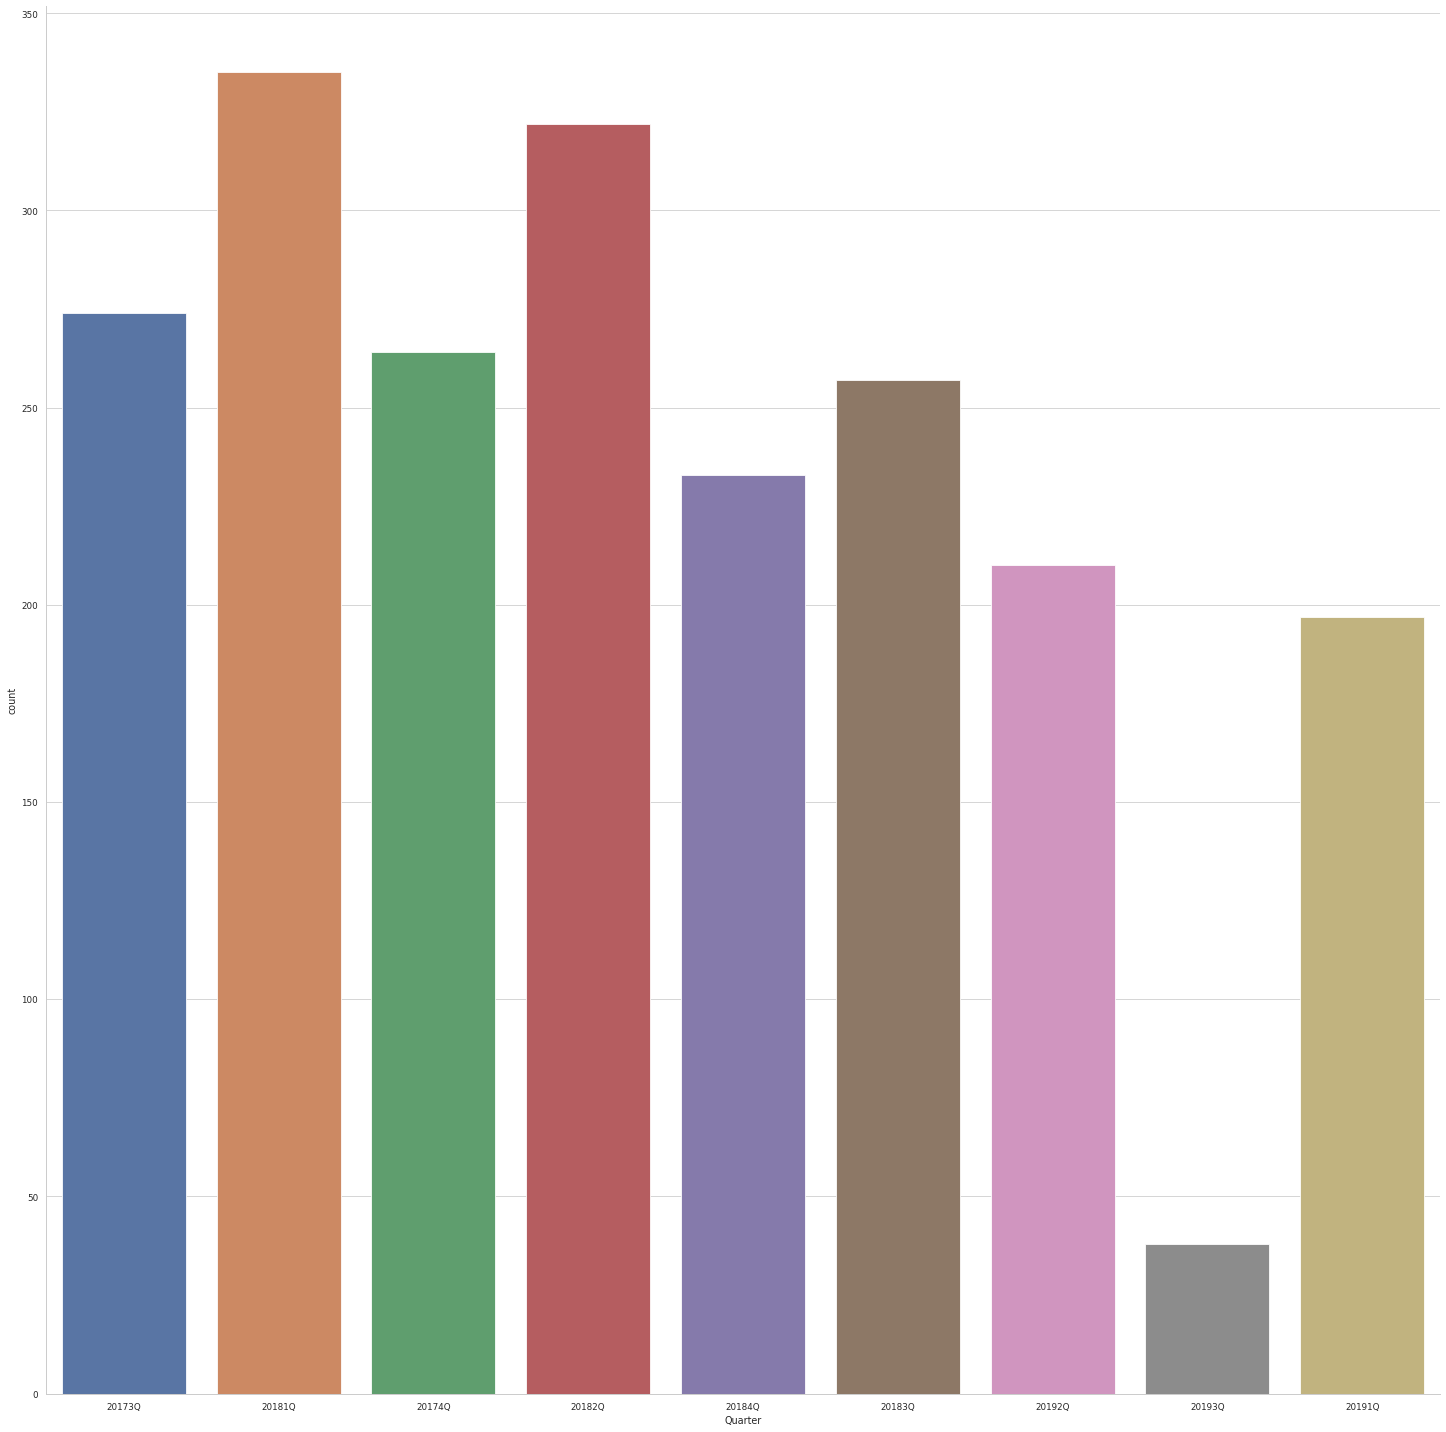

In [27]:
#g = sns.relplot(x="Funded", y="FundingAmount", hue="FundingType", kind="scatter", data=df)
#g.fig.autofmt_xdate()
sns.catplot(x="Quarter", kind="count", data=df, height=20)
plt.gcf()
plt.savefig("data/year-deals.pdf", transparent=True)

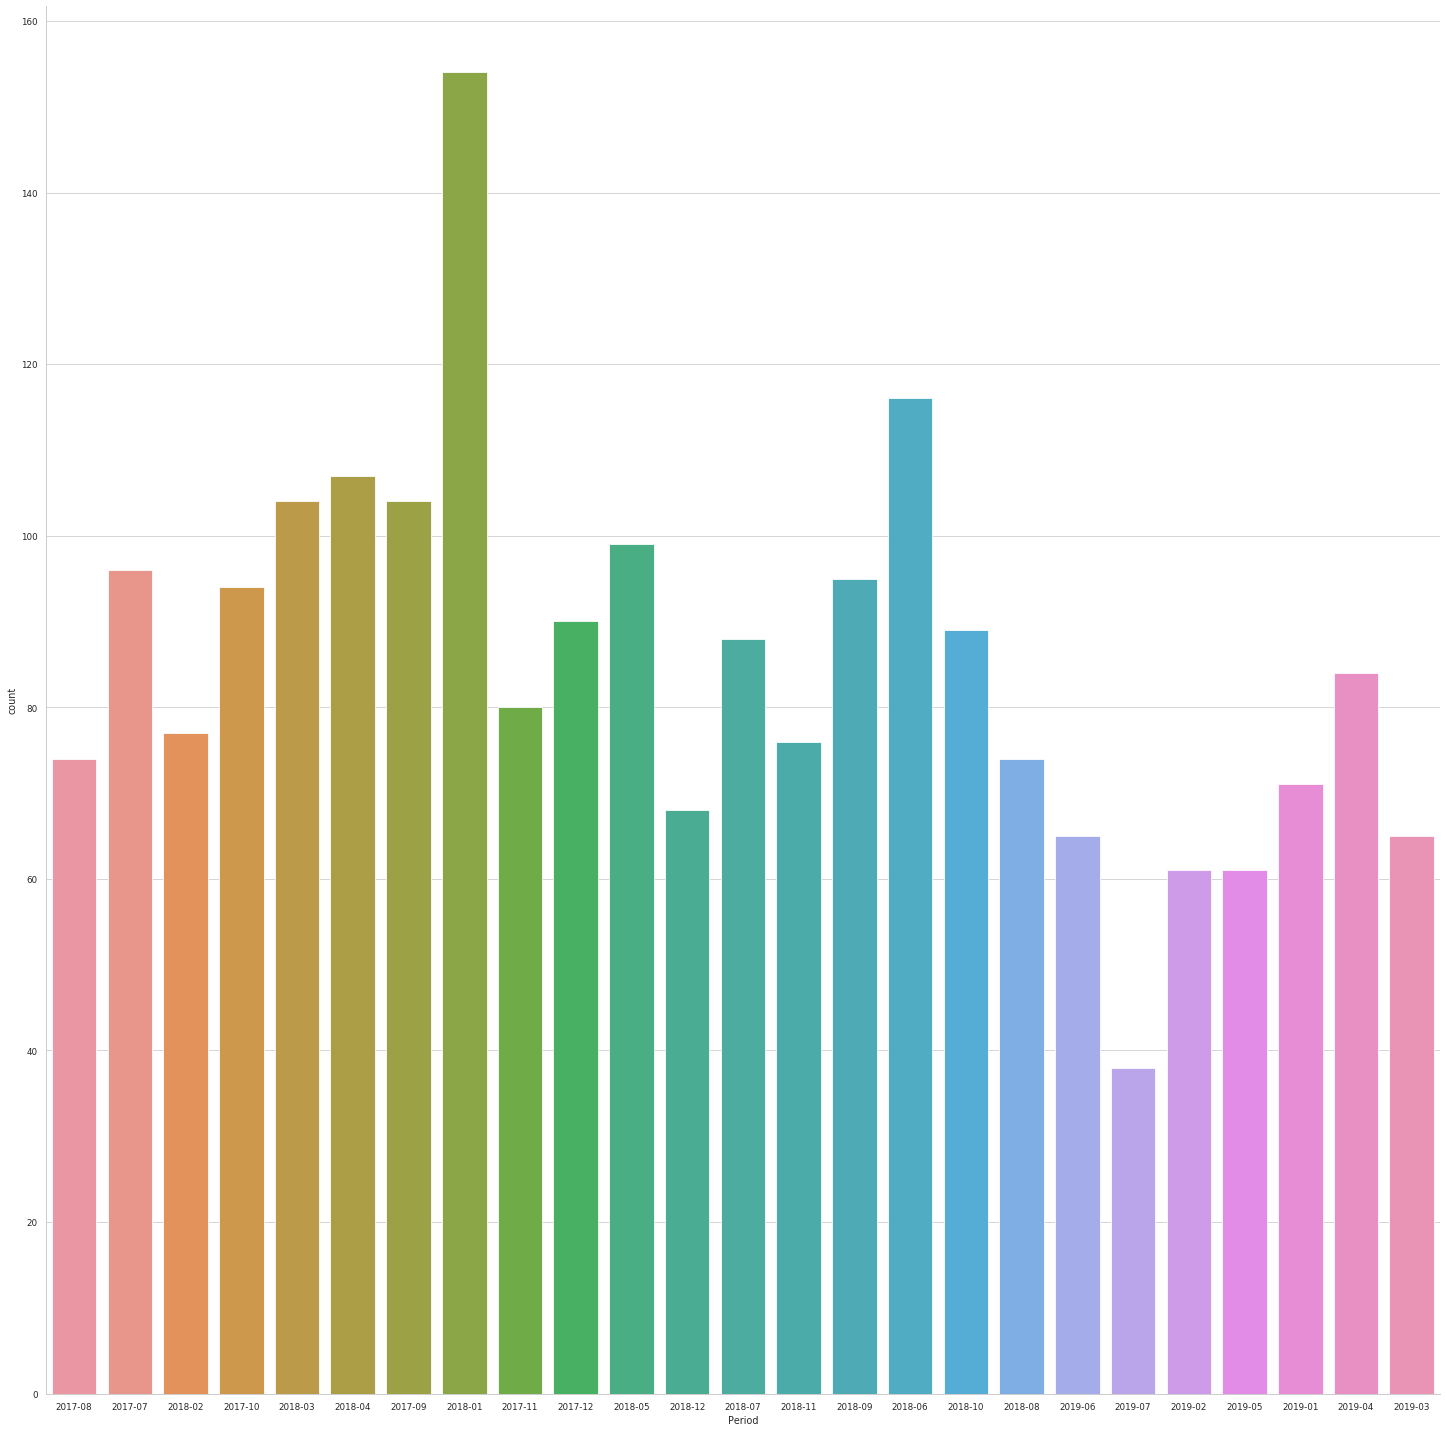

In [28]:
#df.drop(df[df['FundingAmount'] == -1].index, inplace=True)
sns.catplot(x="Period", kind="count", data=df, height=20)
plt.show()

In [30]:
deal_type = df
deal_type['FundingType'].replace([".*IPO.*",".*Secondary.*",".*Venture.*",".*Coin.*",".*Crowdfunding.*",".*[Ee]quity.*",".*Round.*",".*Note.*",".*Debt.*",".*Grant.*"], "Other", regex=True, inplace=True)
deal_type.drop(deal_type[deal_type['FundingType'] == "Other"].index, inplace=True)
deal_type.head(5)

/home/fahmida/.local/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/fahmida/.local/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Funded,Period,FundingAmount,FundingType,FundedDate,Quarter
0,2017,2017-08,4000000.0,Seed,2017-08-28,20173Q
2,2018,2018-02,6000000.0,Seed,2018-02-21,20181Q
4,2018,2018-03,9000000.0,Series A,2018-03-13,20181Q
5,2018,2018-04,-1.0,Seed,2018-04-09,20182Q
6,2017,2017-09,594646.0,Seed,2017-09-04,20173Q


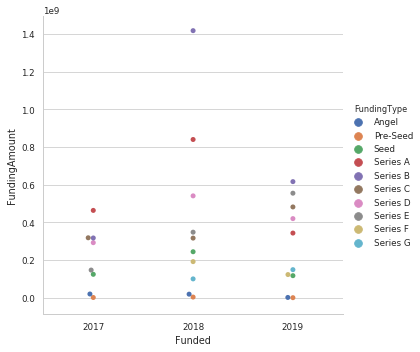

In [31]:
df_deal = pd.DataFrame(deal_type.groupby(['FundingType','Funded']).FundingAmount.sum())
df_deal = df_deal.reset_index()
df_deal.to_csv('data/dealamounts.csv')
sns.catplot(x="Funded", y="FundingAmount", hue="FundingType", kind="swarm", data=df_deal);
#df_deal
#deal_type.plot(x=['Quarter','FundingType'], y="FundingAmount", kind="bar", figsize=(20,10))
#fig, ax = plt.subplots(figsize=(25,10))
#sns.catplot(x="Quarter", hue="FundingType", kind="sum", data=deal_type, ax=ax)
#sns.catplot(x="Quarter", kind="sum", data=deal_type, ax=ax)
#plt.show()
plt.savefig("data/year-funds.pdf", transparent=True)

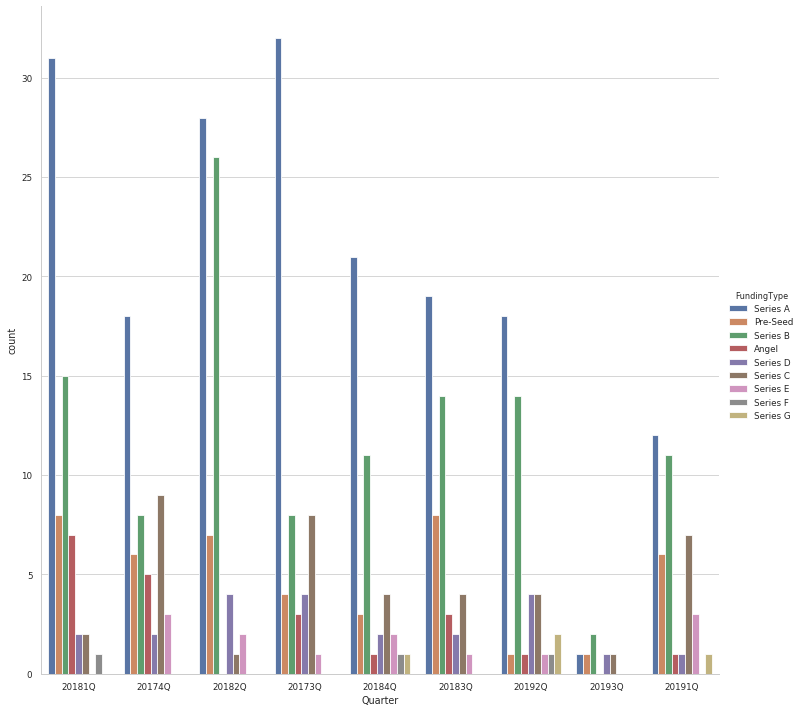

In [33]:
noseed = deal_type[(deal_type.FundingType!='Seed')]
sns.catplot(x="Quarter", hue="FundingType", kind="count", data=noseed, height=10)
#sns.catplot(x="Quarter", kind="sum", data=deal_type, ax=ax)
plt.gcf()
plt.savefig("data/quarter-deals.pdf", transparent=True)

## fig, ax = plt.subplots(figsize=(25,10))
sns.lineplot(x="Quarter", y="FundingAmount", data=deal_type, palette="tab10", linewidth=2.5)
plt.show()

In [30]:
deal_type.FundingAmount.median()

2000000.0